# Loan Data
## by Furkan Küçük

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv("prosperLoanData.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Let's convert types of columns to optimal ones.

In [3]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  string 
 1   ListingNumber                        113937 non-null  Int64  
 2   ListingCreationDate                  113937 non-null  string 
 3   CreditGrade                          28953 non-null   string 
 4   Term                                 113937 non-null  Int64  
 5   LoanStatus                           113937 non-null  string 
 6   ClosedDate                           55089 non-null   string 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Now, let's look at numerical column features.

In [4]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


I would like to treat columns with significantly high count of null values as "severely noisy" columns and drop them.

In [5]:
columns_to_drop = (df.isna().sum() > len(df)*7/10) == True
df = df.drop(columns=columns_to_drop[columns_to_drop == True].keys())
df.drop(columns="ClosedDate", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 69 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          113937 non-null  string 
 1   ListingNumber                       113937 non-null  Int64  
 2   ListingCreationDate                 113937 non-null  string 
 3   Term                                113937 non-null  Int64  
 4   LoanStatus                          113937 non-null  string 
 5   BorrowerAPR                         113912 non-null  float64
 6   BorrowerRate                        113937 non-null  float64
 7   LenderYield                         113937 non-null  float64
 8   EstimatedEffectiveYield             84853 non-null   float64
 9   EstimatedLoss                       84853 non-null   float64
 10  EstimatedReturn                     84853 non-null   float64
 11  ProsperRating (numeric)   

There are still number of columns with a considirably large number of nans. I would like to treat these rows as noise, and delete them. Since there are plenty of data, it's okay to delete them as I will still have plenty of data to gather reliable statistics.

In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 69 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingKey                          76216 non-null  string 
 1   ListingNumber                       76216 non-null  Int64  
 2   ListingCreationDate                 76216 non-null  string 
 3   Term                                76216 non-null  Int64  
 4   LoanStatus                          76216 non-null  string 
 5   BorrowerAPR                         76216 non-null  float64
 6   BorrowerRate                        76216 non-null  float64
 7   LenderYield                         76216 non-null  float64
 8   EstimatedEffectiveYield             76216 non-null  float64
 9   EstimatedLoss                       76216 non-null  float64
 10  EstimatedReturn                     76216 non-null  float64
 11  ProsperRating (numeric)             7621

## Preliminary Findings

- Data contains 113937 samples with 81 columns. (76216 entries and 69 columns after cleaning)

- The data we want to invesitage is:
    - Loan status
    - Prosper Rating
    - Borrower APR

- Features mentioned above may be correlated, or being constructed by other features which may be:
    - Income Range
    - Verifiable Income
    - Ownership of house
    - Employment status

## Univariate Exploration

Since it's a loan data, and we are trying to gather information about what affects these loans the most, the most logical univariate statistic is related to loan status.
Loan status is a string column so let's take a look at what it includes.

In [7]:
df.LoanStatus.value_counts()

Current                   51170
Completed                 17687
Chargedoff                 4444
Defaulted                   885
Past Due (1-15 days)        714
Past Due (31-60 days)       322
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       241
FinalPaymentInProgress      187
Past Due (>120 days)         14
Name: LoanStatus, dtype: Int64

Apperantly it's categorical. 

In [8]:
loan_status = pd.Categorical(df.LoanStatus)
loan_status.value_counts()

Chargedoff                 4444
Completed                 17687
Current                   51170
Defaulted                   885
FinalPaymentInProgress      187
Past Due (1-15 days)        714
Past Due (16-30 days)       241
Past Due (31-60 days)       322
Past Due (61-90 days)       275
Past Due (91-120 days)      277
Past Due (>120 days)         14
dtype: int64

Let's take a look at what we have.

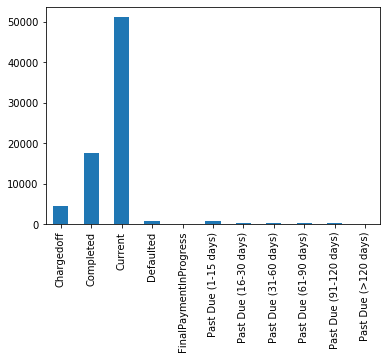

In [9]:
loan_status.value_counts().plot(kind="bar")

Minor columns are being hard to see because currently available loans are dominating. 

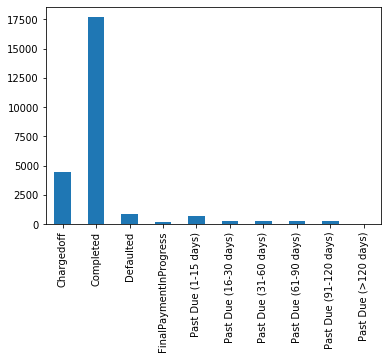

In [10]:
loan_status.value_counts().drop("Current").plot(kind="bar")

In [11]:
loan_status.value_counts()["Completed"] / loan_status.value_counts().drop("Current").sum()

0.706180627645133

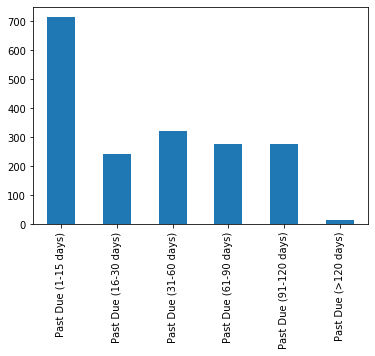

In [12]:
loan_status.value_counts()[-6:].plot(kind="bar")

The visual above shows an exponential-like distribution. From that, we may infer that people may overdue their payments, but majority of them are paying their loans in 15 days.

Apperantly we have good customers overall. 70% of the customers are marked as Completed.

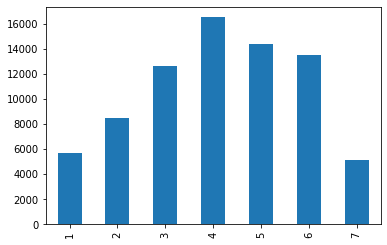

In [27]:
df["ProsperRating (numeric)"].value_counts().sort_index().plot(kind="bar")

Company tries to create a Gaussian distribution when scoring their customers, similar to an exam scoring of a lecture. (BELL CURVE)

## Bivariate Exploration

Let's take a look at correlations to observe which features may have relationship.

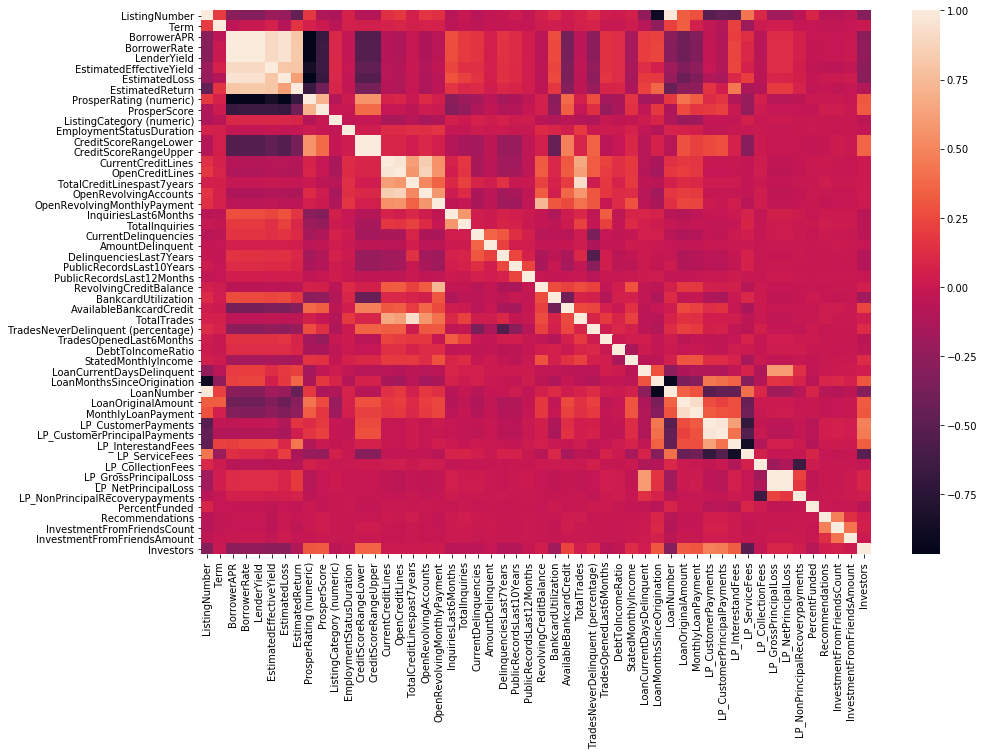

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sb.heatmap(df.corr(), ax=ax);

Borrower APR is highly correlated with Prosper Rating.

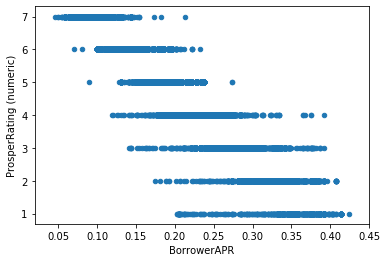

In [14]:
df.plot(kind="scatter", x="BorrowerAPR", y="ProsperRating (numeric)")

Apperantly, the lower prosper rating yields to higher apr levels. Let's investigate why people get lower prosper ratings.

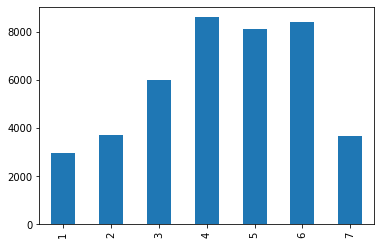

In [15]:
df[df.IsBorrowerHomeowner]["ProsperRating (numeric)"].value_counts().sort_index().plot(kind="bar")

Home owners apperantly tend to have higher ratings, but necessarly.

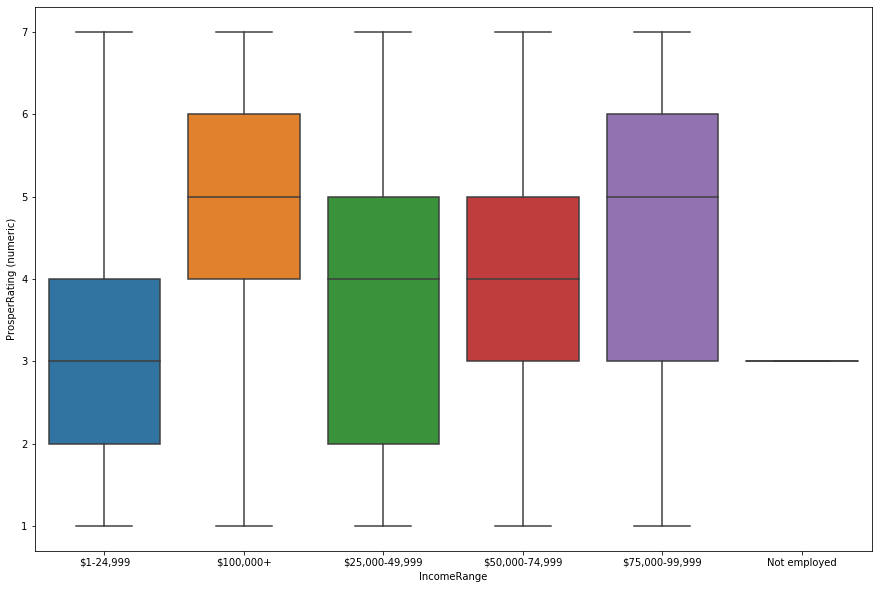

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
sb.boxplot(data = df, x="IncomeRange", y="ProsperRating (numeric)", ax=ax)

Income being high seems like improves prosper rating.

## Multivariate Exploration

Let's investigate incomes further.

We saw that, income range effects prosper rating. How credibility contributes the rating along with income range?

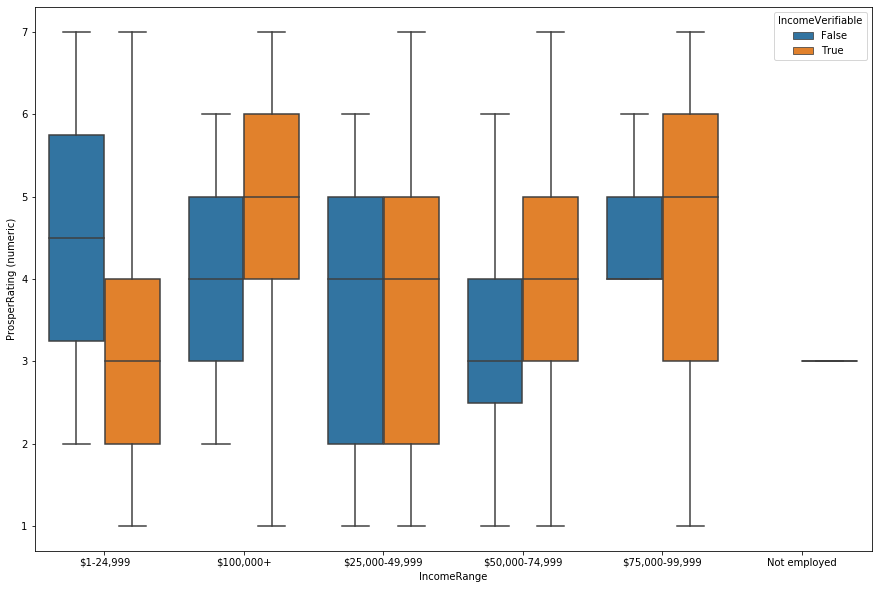

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
sb.boxplot(data = df, x="IncomeRange", y="ProsperRating (numeric)", hue="IncomeVerifiable", ax=ax)

As it can be seen above, verifiable incomes may yield a better prosper rating, except for the lowest income range. 

Now let's see which type of people is in overdue.

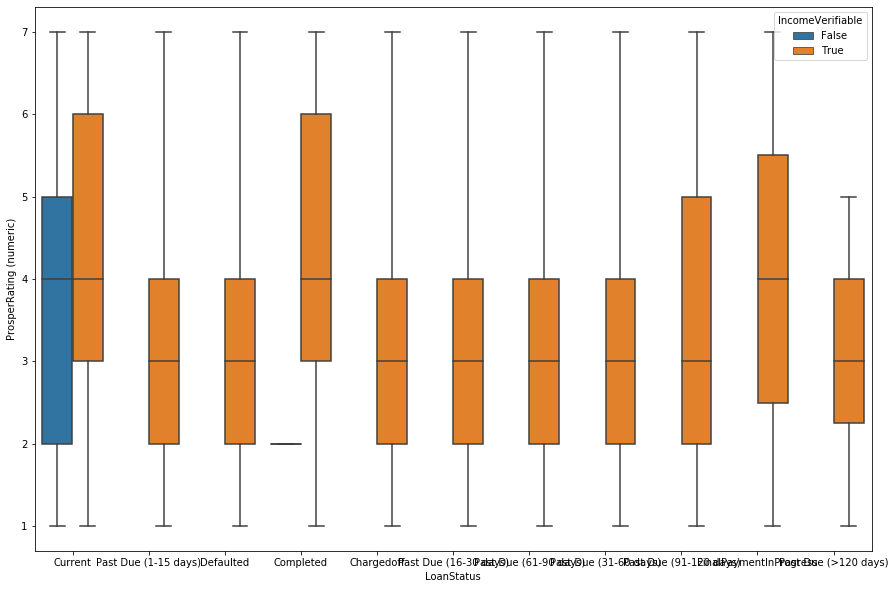

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
sb.boxplot(data = df, y="ProsperRating (numeric)", x="LoanStatus", hue="IncomeVerifiable", ax=ax)

As it can be seen above, verifiable incomes may yield a better prosper rating, except for the lowest income range. 

Now let's see which type of people is in overdue.

There are 2 findings from the image above: 
- Company verifies all of it's customers incomes within loan completion
- Prosper rating system tends to be a succesful metrics to evaluate customers.

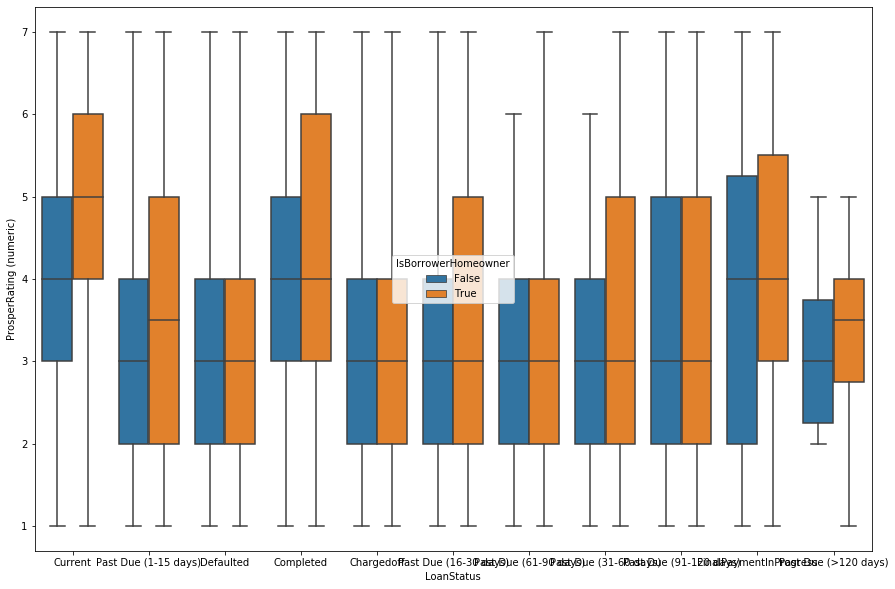

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
sb.boxplot(data = df, y="ProsperRating (numeric)", x="LoanStatus", hue="IsBorrowerHomeowner", ax=ax)

Findings above states that ownership of house is not the best indicator for on-time payments.

# Valuable findings
- Company has a succesful rating system
- People tend to make the payments on time. If they miss it, a large proportion of customers pays within 15 days.
- Rating system considers number of things like being a house owner or income.
- Company tries to create a Gaussian distribution when scoring their customers, similar to an exam scoring of a lecture. This is a valid approach as it models lots of things well.
- Ownership of house is not the best indicator for on-time payments.